In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NBAData.features import *

### *basic outline:* team/player data -> assign rest days -> assign_postion (encode it) -> assign if starter (encode it) -> opp/team encode it -> prop features -> player prop matchup data

In [18]:
pd.set_option('display.max_columns', None)
s21 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_21_FEATURES.csv')
s22 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_22_FEATURES.csv')
s23 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_23_FEATURES.csv')
s24 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_24_FEATURES.csv')
s25 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_25_FEATURES.csv')

data = pd.concat([s21, s22, s23, s24, s25])
data['OPP_TEAM_ID'] = data['OPP_TEAM_ID'].astype(int)
data.drop(columns = ['Unnamed: 0'], inplace=True)
print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns")
data.head()


Data has 8861 rows and 93 columns


,PLAYER_NAME,PLAYER_ID,MATCHUP,TEAM_ABBREVIATION,TEAM_ID,OPP_ABBREVIATION,HOME_GAME,GAME_ID,GAME_DATE,WL,MIN,PTS,AST,REB,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,STL,BLK,TOV,PF,PLUS_MINUS,FANTASY_PTS,PointsPerShot,eFG,START_POSITION,OFF_RATING,DEF_RATING,NET_RATING,OREB_PCT,DREB_PCT,REB_PCT,AST_PCT,AST_TOV,USG_PCT,TS_PCT,E_PACE,PACE,PIE,PACE_PER40,TEAM_GAME_DATE,TEAM_MIN,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_FG3A,TEAM_FG3_PCT,TEAM_FTM,TEAM_FTA,TEAM_FT_PCT,TEAM_OREB,TEAM_DREB,TEAM_REB,TEAM_AST,TEAM_STL,TEAM_BLK,TEAM_TOV,TEAM_PF,TEAM_PTS,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,OPP_TEAM_ID,TEAM_OFF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE,STARTING,USG_PCT_LAST_3,USG_PCT_LAST_5,USG_PCT_LAST_7,PTS_LAST_3,PTS_LAST_5,PTS_LAST_7,STD_PTS_LAST_3,STD_PTS_LAST_5,STD_PTS_LAST_7,PLAYER_HOME_AVG_PTS,PLAYER_AWAY_AVG_PTS,GUARD,FORWARD,CENTER
0,LeBron James,2544,LAL @ PHX,LAL,1610612747,PHX,0,42000151,2021-05-23,L,36,18,10,7,6,13,0.462,3,7,0.429,3,6,0.500,1,6,3,0,5,1,2,45.4,1.151,1.151,F,104.4,98.6,5.8,0.030,0.162,0.100,0.476,2.00,0.263,0.575,89.63,91.84,0.183,76.54,"MAY 23, 2021",240,33,76,0.434,7,26,0.269,17,28,0.607,10,23,33,19,10,5,14,18,90,97.487002,7.0,4.0,47.0,0.465116,1610612756,97.487002,92.32,90.80,89.28,1,0.26,0.26,0.26,18.00,18.00,18.00,NaN,NaN,NaN,NaN,18.00,0,1,0
1,LeBron James,2544,LAL @ PHX,LAL,1610612747,PHX,0,42000152,2021-05-25,W,39,23,9,4,9,16,0.563,4,9,0.444,1,1,1.000,0,4,2,0,1,3,14,46.3,1.399,1.399,F,129.3,112.2,17.2,0.000,0.121,0.058,0.360,9.00,0.193,0.700,94.54,91.95,0.176,76.62,"MAY 25, 2021",240,36,80,0.450,10,33,0.303,27,31,0.871,8,31,39,24,9,6,7,23,109,117.659758,4.0,3.0,31.0,0.464789,1610612756,117.659758,92.64,92.92,93.20,1,0.23,0.23,0.23,20.50,20.50,20.50,3.54,3.54,3.54,NaN,20.50,0,1,0
2,LeBron James,2544,LAL vs. PHX,LAL,1610612747,PHX,1,42000153,2021-05-27,W,38,21,9,6,9,19,0.474,1,5,0.200,2,3,0.667,1,5,1,0,7,0,15,37.7,1.033,1.033,F,106.2,89.9,16.3,0.024,0.125,0.074,0.450,1.29,0.273,0.517,103.57,101.71,0.165,84.76,"MAY 27, 2021",240,38,86,0.442,7,28,0.250,26,30,0.867,15,36,51,19,10,4,20,19,109,104.606526,8.0,6.0,35.0,0.426829,1610612756,104.606526,104.20,101.56,98.92,1,0.24,0.24,0.24,20.67,20.67,20.67,2.52,2.52,2.52,21.0,NaN,0,1,0
3,LeBron James,2544,LAL vs. PHX,LAL,1610612747,PHX,1,42000154,2021-05-30,L,38,25,6,12,10,21,0.476,1,7,0.143,4,7,0.571,2,10,1,0,6,1,6,45.4,1.038,1.038,F,105.3,97.3,8.0,0.057,0.233,0.154,0.353,1.00,0.361,0.519,93.89,95.18,0.167,79.32,"MAY 30, 2021",240,32,81,0.395,13,40,0.325,15,21,0.714,9,41,50,19,3,5,15,18,92,95.594347,12.0,4.0,49.0,0.435294,1610612756,95.594347,96.24,95.74,95.24,1,0.28,0.27,0.27,23.00,21.75,21.75,2.00,2.99,2.99,23.0,NaN,0,1,0
4,LeBron James,2544,LAL @ PHX,LAL,1610612747,PHX,0,42000155,2021-06-01,L,32,24,7,5,9,19,0.474,6,10,0.600,0,0,NaN,1,4,0,0,3,1,-24,37.5,1.263,1.263,F,90.5,128.6,-38.1,0.029,0.121,0.074,0.700,2.33,0.310,0.632,99.78,95.57,0.195,79.64,"JUN 01, 2021",240,29,84,0.345,12,35,0.343,15,21,0.714,10,41,51,14,3,1,16,25,85,85.650947,7.0,4.0,47.0,0.457447,1610612756,85.650947,99.24,101.74,104.24,1,0.31,0.28,0.28,23.33,22.20,22.20,2.08,2.77,2.77,NaN,21.67,0,1,0


In [19]:
list(data.columns)

['PLAYER_NAME',
 'PLAYER_ID',
 'MATCHUP',
 'TEAM_ABBREVIATION',
 'TEAM_ID',
 'OPP_ABBREVIATION',
 'HOME_GAME',
 'GAME_ID',
 'GAME_DATE',
 'WL',
 'MIN',
 'PTS',
 'AST',
 'REB',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PLUS_MINUS',
 'FANTASY_PTS',
 'PointsPerShot',
 'eFG',
 'START_POSITION',
 'OFF_RATING',
 'DEF_RATING',
 'NET_RATING',
 'OREB_PCT',
 'DREB_PCT',
 'REB_PCT',
 'AST_PCT',
 'AST_TOV',
 'USG_PCT',
 'TS_PCT',
 'E_PACE',
 'PACE',
 'PIE',
 'PACE_PER40',
 'TEAM_GAME_DATE',
 'TEAM_MIN',
 'TEAM_FGM',
 'TEAM_FGA',
 'TEAM_FG_PCT',
 'TEAM_FG3M',
 'TEAM_FG3A',
 'TEAM_FG3_PCT',
 'TEAM_FTM',
 'TEAM_FTA',
 'TEAM_FT_PCT',
 'TEAM_OREB',
 'TEAM_DREB',
 'TEAM_REB',
 'TEAM_AST',
 'TEAM_STL',
 'TEAM_BLK',
 'TEAM_TOV',
 'TEAM_PF',
 'TEAM_PTS',
 'OPP_DEF_RATING',
 'OPP_STL',
 'OPP_BLK',
 'OPP_REB',
 'OPP_FG_PCT',
 'OPP_TEAM_ID',
 'TEAM_OFF_RATING',
 'TEAM_PACE',
 'GAME_PACE',
 'OPP_PACE',
 'STARTING',
 'U

In [6]:
data.groupby('PLAYER_NAME')['PTS'].sum().sort_values(ascending=False).head(10)

PLAYER_NAME
Jayson Tatum             2011
Nikola Jokić             1764
Jaylen Brown             1704
Jalen Brunson            1701
Luka Dončić              1511
Jimmy Butler III         1327
Devin Booker             1315
Giannis Antetokounmpo    1249
Stephen Curry            1179
Donovan Mitchell         1154
Name: PTS, dtype: int64

### Prepare data for training

In [20]:
features = [
    'MIN','FGA', 'FTA', 'FG3A','REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
    'OFF_RATING', 'DEF_RATING', 'NET_RATING',
    'AST_PCT', 'AST_TOV','USG_PCT', 'TS_PCT','PACE',
    'TEAM_FGA', 'TEAM_FG3A','TEAM_FTA',
    'TEAM_AST', 'TEAM_REB', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF',
    'TEAM_OFF_RATING', 'TEAM_PACE', 
    #grab oppenents avgerages for the game
    'OPP_PACE', 'OPP_DEF_RATING',
    'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_FG_PCT',
    #rolling averages
    'USG_PCT_LAST_3', 'USG_PCT_LAST_5', 'USG_PCT_LAST_7',
    'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7',
    'STD_PTS_LAST_3', 'STD_PTS_LAST_5', 'STD_PTS_LAST_7',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS',
    #ill input these during prediction
    'GUARD', 'FORWARD', 'CENTER', 'HOME_GAME', 'STARTING',
]

In [21]:
corr_matrix = data.corr(numeric_only=True)
target = corr_matrix['PTS'].sort_values(ascending=False).head(15)
target


PTS                    1.000000
FGM                    0.973307
FGA                    0.914735
FANTASY_PTS            0.912418
PLAYER_HOME_AVG_PTS    0.901022
PTS_LAST_3             0.898836
PLAYER_AWAY_AVG_PTS    0.895262
PTS_LAST_5             0.880369
PTS_LAST_7             0.873390
MIN                    0.771389
FTM                    0.705141
FTA                    0.701358
FG3M                   0.672417
FG3A                   0.671081
STARTING               0.591490
Name: PTS, dtype: float64

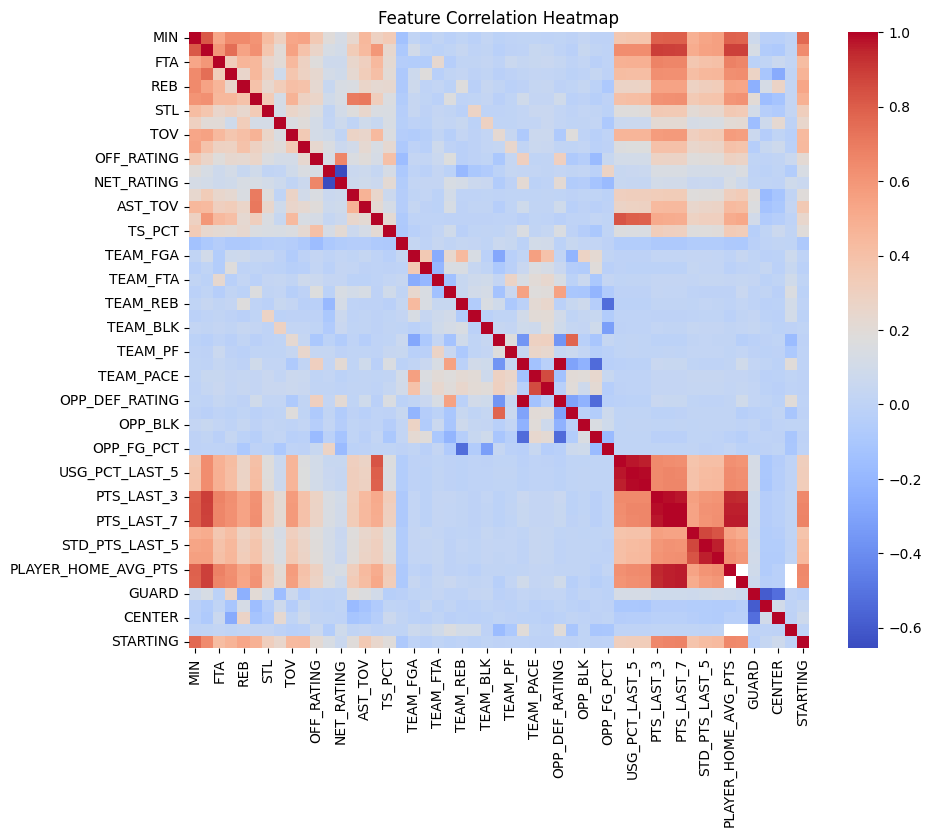

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data[features].corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Train XGBoost model

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = data[features]
y = data['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
XGB_model = xgb.XGBRegressor()
XGB_model.fit(X_train, y_train)
pred = XGB_model.predict(X_test)

print(f"R-squared: {round(r2_score(y_test, pred), 3)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, pred), 3)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, pred), 3)}")



R-squared: 0.995
Mean Absolute Error: 0.335
Mean Squared Error: 0.44


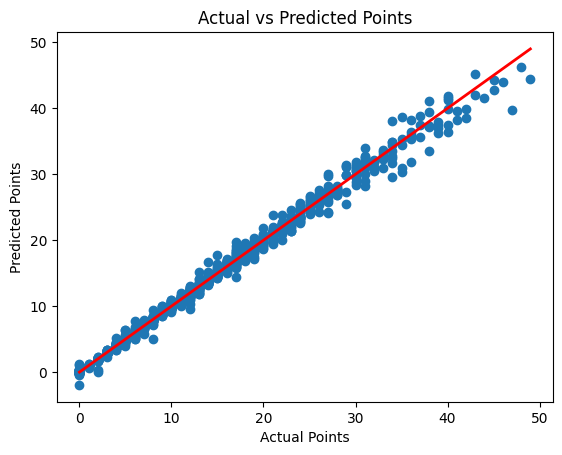

In [25]:
plt.scatter(y_test, pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()


In [26]:
avg_features = [
    'PLAYER_NAME','OPP_ABBREVIATION','GAME_DATE','MIN','FGA', 'FTA', 'FG3A','REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
    'OFF_RATING', 'DEF_RATING', 'NET_RATING',
    'AST_PCT', 'AST_TOV','USG_PCT', 'TS_PCT','PACE',
    'TEAM_FGA', 'TEAM_FG3A','TEAM_FTA',
    'TEAM_AST', 'TEAM_REB', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF',
    'TEAM_OFF_RATING', 'TEAM_PACE', 'OPP_PACE', 'OPP_DEF_RATING',
    'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_FG_PCT',
    'HOME_GAME', 'STARTING',
    'USG_PCT_LAST_3', 'USG_PCT_LAST_5', 'USG_PCT_LAST_7',
    'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7',
    'STD_PTS_LAST_3', 'STD_PTS_LAST_5', 'STD_PTS_LAST_7',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS',
    'GUARD', 'FORWARD', 'CENTER'
]

df = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_25_FEATURES.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
df[avg_features]

,PLAYER_NAME,OPP_ABBREVIATION,GAME_DATE,MIN,FGA,FTA,FG3A,REB,AST,STL,BLK,TOV,PF,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TOV,USG_PCT,TS_PCT,PACE,TEAM_FGA,TEAM_FG3A,TEAM_FTA,TEAM_AST,TEAM_REB,TEAM_STL,TEAM_BLK,TEAM_TOV,TEAM_PF,TEAM_OFF_RATING,TEAM_PACE,OPP_PACE,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,HOME_GAME,STARTING,USG_PCT_LAST_3,USG_PCT_LAST_5,USG_PCT_LAST_7,PTS_LAST_3,PTS_LAST_5,PTS_LAST_7,STD_PTS_LAST_3,STD_PTS_LAST_5,STD_PTS_LAST_7,PLAYER_HOME_AVG_PTS,PLAYER_AWAY_AVG_PTS,GUARD,FORWARD,CENTER
0,LeBron James,MIN,2025-04-19,36,18,2,5,5,3,2,3,4,0,108.7,142.6,-34.0,0.158,0.75,0.278,0.503,90.70,83,41,16,15,38,5,4,13,10,105.508663,90.04,89.40,105.508663,8.0,4.0,44.0,0.511628,1,1,0.28,0.28,0.28,19.00,19.00,19.00,NaN,NaN,NaN,19.00,NaN,0,1,0
1,LeBron James,MIN,2025-04-22,40,19,4,5,11,7,1,1,2,4,111.4,98.6,12.9,0.368,3.50,0.284,0.506,84.81,75,29,20,23,41,4,6,12,24,108.294931,86.80,92.00,108.294931,6.0,2.0,34.0,0.379747,1,1,0.28,0.28,0.28,20.00,20.00,20.00,1.41,1.41,1.41,20.00,NaN,0,1,0
2,LeBron James,MIN,2025-04-25,41,21,10,9,10,4,2,2,1,0,109.9,117.9,-8.0,0.211,4.00,0.286,0.748,96.23,78,40,20,21,38,5,7,16,23,108.559499,95.80,99.24,108.559499,10.0,5.0,38.0,0.483516,0,1,0.28,0.28,0.28,26.00,26.00,26.00,10.44,10.44,10.44,NaN,38.00,0,1,0
3,LeBron James,MIN,2025-04-27,46,9,18,4,12,8,3,3,3,2,119.1,125.0,-5.9,0.276,2.67,0.186,0.798,91.88,80,47,25,23,41,6,7,10,23,125.555556,90.00,95.52,125.555556,8.0,2.0,49.0,0.422222,0,1,0.25,0.26,0.26,28.67,26.25,26.25,8.62,8.54,8.54,NaN,32.50,0,1,0
4,LeBron James,MIN,2025-04-30,40,21,6,5,7,6,2,0,3,2,93.8,112.7,-18.9,0.375,2.00,0.292,0.465,94.34,78,37,25,24,37,5,1,15,25,100.000000,96.00,96.52,100.000000,8.0,5.0,54.0,0.404494,1,1,0.25,0.27,0.27,29.00,25.40,25.40,8.19,7.64,7.64,20.67,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,Quinten Post,MIN,2025-05-06,6,0,0,0,1,0,0,0,0,0,138.5,28.6,109.9,0.000,0.00,0.000,0.000,102.32,87,42,15,26,51,10,2,12,18,113.013699,87.60,97.48,113.013699,7.0,6.0,41.0,0.395349,0,0,0.00,0.14,0.14,1.67,4.60,5.29,2.89,5.32,5.35,NaN,3.40,0,0,1
1688,Quinten Post,MIN,2025-05-08,3,0,0,0,0,0,0,0,0,0,0.0,216.7,-216.7,0.000,0.00,0.000,0.000,80.00,76,32,25,23,42,8,2,17,16,98.936170,94.00,96.80,98.936170,10.0,5.0,39.0,0.505747,0,1,0.00,0.06,0.11,0.00,2.00,3.57,0.00,2.74,4.72,NaN,2.83,0,0,1
1689,Quinten Post,MIN,2025-05-10,3,0,0,0,0,0,0,0,0,1,40.0,160.0,-120.0,0.000,0.00,0.000,0.000,95.36,81,23,21,21,36,6,7,14,24,105.160451,92.24,96.24,105.160451,4.0,7.0,44.0,0.439024,1,0,0.00,0.00,0.09,0.00,1.00,3.29,0.00,2.24,4.89,5.00,NaN,0,0,1
1690,Quinten Post,MIN,2025-05-12,5,4,0,2,2,1,0,0,0,1,146.2,38.5,107.7,0.200,0.00,0.286,0.625,134.68,85,27,33,18,38,10,1,15,25,109.430959,100.52,103.44,109.430959,9.0,5.0,38.0,0.493671,1,0,0.10,0.06,0.09,1.67,1.00,2.14,2.89,2.24,2.67,5.00,NaN,0,0,1


In [27]:
def getPlayerAVG(player, data):
    player_data = data[data['PLAYER_NAME'] == player]
    res = []
    exclude = ['PLAYER_NAME','OPP_ABBREVIATION','OPP_PACE','OPP_DEF_RATING','OPP_STL','OPP_BLK','OPP_REB','OPP_FG_PCT','HOME_GAME','STARTING',
    'USG_PCT_LAST_3','USG_PCT_LAST_5','USG_PCT_LAST_7','PTS_LAST_3','PTS_LAST_5','PTS_LAST_7','STD_PTS_LAST_3','STD_PTS_LAST_5','STD_PTS_LAST_7','PLAYER_HOME_AVG_PTS','PLAYER_AWAY_AVG_PTS','GUARD','FORWARD','CENTER',
]
    for col in player_data[avg_features].columns:
        if col not in exclude:
            res.append(round(player_data[col].mean(), 2))
    return res

def getOppAVG(team, data):
    team_data = data[data['OPP_ABBREVIATION'] == team]
    res = []
    include = ['OPP_DEF_RATING', 'OPP_STL',	'OPP_BLK','OPP_REB','OPP_FG_PCT','OPP_PACE']
    for col in include: 
        res.append(round(team_data[col].mean(), 2))
    return res

def getPlayerRollingAVG(player, data):
    player = data[data['PLAYER_NAME'] == player]
    player.sort_values(by='GAME_DATE', inplace=True)
    res = {}
    include = ['USG_PCT_LAST_3','USG_PCT_LAST_5','USG_PCT_LAST_7','PTS_LAST_3','PTS_LAST_5','PTS_LAST_7',
               'STD_PTS_LAST_3','STD_PTS_LAST_5','STD_PTS_LAST_7','PLAYER_HOME_AVG_PTS','PLAYER_AWAY_AVG_PTS',]
    for col in include:
        res[col] = player[col].iloc[-1]
    return res

# predictions = getPlayerAVG('Shai Gilgeous-Alexander', df) + getOppAVG('MIN', data) + getPlayerRollingAVG('Shai Gilgeous-Alexander', df)

getPlayerRollingAVG('Shai Gilgeous-Alexander', df)
    

C:\Users\alexg\AppData\Local\Temp\ipykernel_19608\4137432739.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player.sort_values(by='GAME_DATE', inplace=True)


{'USG_PCT_LAST_3': 0.36,
 'USG_PCT_LAST_5': 0.36,
 'USG_PCT_LAST_7': 0.36,
 'PTS_LAST_3': 35.33,
 'PTS_LAST_5': 32.0,
 'PTS_LAST_7': 32.71,
 'STD_PTS_LAST_3': 2.31,
 'STD_PTS_LAST_5': 10.39,
 'STD_PTS_LAST_7': 8.81,
 'PLAYER_HOME_AVG_PTS': 31.82,
 'PLAYER_AWAY_AVG_PTS': nan}